In [ ]:
a=np.where(1 > -2, 1, 0)
int(a)

1

In [1]:
import numpy as np
from sklearn.datasets import fetch_openml
phoneme = fetch_openml(name='phoneme')
X = phoneme.data
y = np.vectorize(lambda x: int(x)-1)(phoneme.target)

In [ ]:
X

,V1,V2,V3,V4,V5
0,0.489927,-0.451528,-1.047990,-0.598693,-0.020418
1,-0.641265,0.109245,0.292130,-0.916804,0.240223
2,0.870593,-0.459862,0.578159,0.806634,0.835248
3,-0.628439,-0.316284,1.934295,-1.427099,-0.136583
4,-0.596399,0.015938,2.043206,-1.688448,-0.948127
...,...,...,...,...,...
5399,-0.658318,1.331760,-0.081621,1.794253,-1.082181
5400,-0.044375,-0.010512,0.030989,-0.019379,1.281061
5401,0.246882,-0.793228,1.190101,1.423194,-1.303036
5402,-0.778907,-0.383111,1.727029,-1.432389,-1.208085


In [2]:
import tensorflow as tf
class StochasticPerceptron(object):

    def __init__(self, lr=0.1, epochs=100):
        # lr --> learning rate.
        # epochs --> Number of iterations.
        self.lr = lr
        self.epochs = epochs

    def fit(self, X, y):
      # X --> Inputs.
      # y --> labels/target.
        #self.w_ = [weight[0],weight[1],weight[2]]
        #self.w_ = np.random.normal(0, 1, 3)
        initializer = tf.keras.initializers.Ones()
        self.w_ =initializer(shape=(5,))
        self.w_=self.w_.numpy()
        self.errors_ = []
        
        for epoch in range(int(self.epochs) + 1):
            num_miss = 0
           
            for idx, xi in enumerate(X): 
                pred_error = (y[idx] - self.predict_tr(xi))
                if pred_error != 0:
                    num_miss = (num_miss + 1)
            self.errors_.append(num_miss)
            for i in range(X.shape[1]):
              self.w_[i] +=  self.lr * pred_error*xi[i]

               
  
            
        return self 


    def predict_tr(self, xi):
        re=np.dot(xi, self.w_)
        return np.where(re > -2, 1, 0)
    def predict(self, X):
      pred=[]
      for idx, xi in enumerate(X): 
        pred.append( int(self.predict_tr(xi)))
      return pred

In [3]:
def calculate_prior():
    classes = sorted(list(y))
    count = [0,0]
    prior = [0,0]
    for i in classes:
        count[i]+=1
    for i in range( len(count)):
      prior[i]=count[i]/len(y_train)

    return prior

def calculate_likelihood_rbf(X_tr, x_unknown, target, Y_tr,h=2):
    X_tr_tmp=[]
    j=0
    for i in range(len(X_tr)):
      if Y_tr[i]==target:
        X_tr_tmp.append(X_tr[i])
        
    mean= np.mean(X_tr_tmp)
    p_x_given_y =  np.exp(-((x_unknown-mean)**2 / ( 2*h )))
    return p_x_given_y

In [4]:
def naive_bayes_rbf(X_train,  y_train, X_test, y_test):
    # get feature names
    num_features = X_train.shape[1]
    num_labels = 2 #2 class
    
    
    # calculate prior
    prior = calculate_prior()

    Y_pred_test = []
    Y_pred_train = []
    # loop over every data sample
    for x in X_test:
        # calculate likelihood
        
        likelihood = [1]*num_labels
        for j in range(num_labels):
            for i in range(num_features):
                likelihood[j] *= calculate_likelihood_rbf(X_train[:,i], x[i], j, y_train)

        # calculate posterior probability (numerator only)
        post_prob = [1]*num_labels
        for j in range(num_labels):
            post_prob[j] = likelihood[j] * prior[j]

        Y_pred_test.append(np.argmax(post_prob))
    for x in X_train:
        # calculate likelihood
        
        likelihood = [1]*num_labels
        for j in range(num_labels):
            for i in range(num_features):
                likelihood[j] *= calculate_likelihood_rbf(X_train[:,i], x[i], j, y_train)

        # calculate posterior probability (numerator only)
        post_prob = [1]*num_labels
        for j in range(num_labels):
            post_prob[j] = likelihood[j] * prior[j]

        Y_pred_train.append(np.argmax(post_prob))
    train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, Y_pred_train)
    test_fpr, test_tpr, te_thresholds = roc_curve(y_test, Y_pred_test)
    auc_train=auc(train_fpr,train_tpr)
    auc_test=auc(test_fpr,test_tpr)
  #return ((train_errors,test_errors),(train_fpr, train_tpr, tr_thresholds),(test_fpr, test_tpr, te_thresholds))
    return (auc_train, auc_test)
     # Compute ROC curve and ROC area for each class
   


In [ ]:
result_rbf= naive_bayes_classifier(X_train, X_test,y_train,h,"rbf")
from sklearn.metrics import confusion_matrix, f1_score
print("Confution Matrix for flat kernel: \n", confusion_matrix(y_test, result_rbf))
print("\n Accuracy F1 score(rbf): \n", f1_score(y_test, result_rbf,average='macro'))

In [5]:

from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
train_errors = list()
test_errors = list()
def perceptron(X_train1, y_train1, X_test1, y_test1):
  clf = StochasticPerceptron(epochs=10.0, lr=.1)
  clf.fit(X_train1,y_train1)
  
  y_test_pred1 = clf.predict(X_test1)
  y_train_pred1= clf.predict(X_train1)
   # Compute ROC curve and ROC area for each class
  train_fpr, train_tpr, tr_thresholds = roc_curve(y_train1, y_train_pred1)
  test_fpr, test_tpr, te_thresholds = roc_curve(y_test1, y_test_pred1)
  auc_train=auc(train_fpr,train_tpr)
  auc_test=auc(test_fpr,test_tpr)
  #return ((train_errors,test_errors),(train_fpr, train_tpr, tr_thresholds),(test_fpr, test_tpr, te_thresholds))
  return (auc_train, auc_test)

def knn(X_train, y_train, X_test, y_test):
  clf = KNeighborsClassifier(n_neighbors=3)
  clf.fit(X_train, y_train)
  y_test_pred = clf.predict(X_test)
  y_train_pred= clf.predict(X_train)
  # Compute ROC curve and ROC area for each class
  train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
  test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)
  auc_train=auc(train_fpr,train_tpr)
  auc_test=auc(test_fpr,test_tpr)
  #return ((train_errors,test_errors),(train_fpr, train_tpr, tr_thresholds),(test_fpr, test_tpr, te_thresholds))
  return (auc_train, auc_test)


def svm_rbf(X_train, y_train, X_test, y_test):
  clf = svm.SVC(kernel='rbf')
  clf.fit(X_train, y_train)
  y_test_pred = clf.predict(X_test)
  y_train_pred= clf.predict(X_train)
  #train_errors = clf.score(X_train, y_train)
  #test_errors = clf.score(X_test, y_test)
  #print(train_errors)

  # Compute ROC curve and ROC area for each class
  train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
  test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)
  auc_train=auc(train_fpr,train_tpr)
  auc_test=auc(test_fpr,test_tpr)
  #return ((train_errors,test_errors),(train_fpr, train_tpr, tr_thresholds),(test_fpr, test_tpr, te_thresholds))
  return (auc_train, auc_test)


def logistic(X_train, y_train, X_test, y_test):
  clf = LogisticRegression(random_state=0).fit(X_train, y_train)
  y_test_pred = clf.predict(X_test)
  y_train_pred= clf.predict(X_train)
  #train_errors = clf.score(X_train, y_train)
  #test_errors = clf.score(X_test, y_test)
  #print(train_errors)

  # Compute ROC curve and ROC area for each class
  train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
  test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)
  auc_train=auc(train_fpr,train_tpr)
  auc_test=auc(test_fpr,test_tpr)
  #return ((train_errors,test_errors),(train_fpr, train_tpr, tr_thresholds),(test_fpr, test_tpr, te_thresholds))
  return (auc_train, auc_test)
from sklearn.naive_bayes import GaussianNB
def NB_gaussian(X_train, y_train, X_test, y_test):

  clf = GaussianNB()
  y_pred = clf.fit(X_train, y_train)
  y_test_pred = clf.predict(X_test)
  y_train_pred= clf.predict(X_train)
  #train_errors = clf.score(X_train, y_train)
  #test_errors = clf.score(X_test, y_test)
  #print(train_errors)

  # Compute ROC curve and ROC area for each class
  train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
  test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)
  auc_train=auc(train_fpr,train_tpr)
  auc_test=auc(test_fpr,test_tpr)
  #return ((train_errors,test_errors),(train_fpr, train_tpr, tr_thresholds),(test_fpr, test_tpr, te_thresholds))
  return (auc_train, auc_test)

In [6]:
from random import randrange
def cross_validation_split(dataset, folds):
        dataset_split = []
        df_copy = dataset
        fold_size = int(df_copy.shape[0] / folds)
        
        # for loop to save each fold
        for i in range(folds):
            fold = []
            # while loop to add elements to the folds
            while len(fold) < fold_size:
                # select a random element
                r = randrange(df_copy.shape[0])
                # determine the index of this element 
                index = df_copy.index[r]
                # save the randomly selected line 
                fold.append(df_copy.loc[index].values.tolist())
                # delete the randomly selected line from
                # dataframe not to select again
                df_copy = df_copy.drop(index)
            # save the fold     
            dataset_split.append(np.asarray(fold))
            
        return dataset_split 

In [36]:
def kfoldCV(dataset, f=10, k=5, model="logistic"):
    data=cross_validation_split(dataset,f)
    auc_result=[]
    # determine training and test sets 
    for i in range(f):
        r = list(range(f))
        r.pop(i)
        for j in r :
            if j == r[0]:
                cv = data[j]
            else:    
                cv=np.concatenate((cv,data[j]), axis=0)
        
        # apply the selected model
        # default is logistic regression
        if model == "svm_rbf":
            # default: alpha=0.1, num_iter=30000
            # if you change alpha or num_iter, adjust the below line         
            result= svm_rbf(cv[:,0:5],cv[:,5],data[i][:,0:5],data[i][:,5])
            auc_result.append(result)
        elif model == "knn": 
          result= knn(cv[:,0:5],cv[:,5],data[i][:,0:5],data[i][:,5])
          auc_result.append(result)
        elif model == "logistic": 
          result= logistic(cv[:,0:5],cv[:,5],data[i][:,0:5],data[i][:,5])
          auc_result.append(result)
        elif model == "NB_KDE":
          result= naive_bayes_rbf(cv[:,0:5],cv[:,5],data[i][:,0:5],data[i][:,5])
          auc_result.append(result)
        elif model == "NB_G":
          result= NB_gaussian(cv[:,0:5],cv[:,5],data[i][:,0:5],data[i][:,5])
          auc_result.append(result)
        elif model == "perceptron":
          result= perceptron(cv[:,0:5],cv[:,5],data[i][:,0:5],data[i][:,5])
          auc_result.append(result)
        elif model == "knn_nested":
          result= knn_nested(cv[:,0:5],cv[:,5],data[i][:,0:5],data[i][:,5])
          auc_result.append(result)
        elif model == "svm_nested":
          result= svm_nested(cv[:,0:5],cv[:,5],data[i][:,0:5],data[i][:,5])
          auc_result.append(result)
        elif model == "GNB_nested":
          result= NB_gaussian_nested(cv[:,0:5],cv[:,5],data[i][:,0:5],data[i][:,5])
          auc_result.append(result)
    return auc_result 

In [13]:
import pandas as pd
    # Adjusting the data type

X_df=pd.DataFrame(X)
X_df[5]=y
print("hx")


#result_logistic=kfoldCV(X_df,model="NB_KDE")
#result_logistic=kfoldCV(X_df,model="NB_KDE")


hx


In [14]:
result_svm=kfoldCV(X_df,model="svm_rbf")

In [15]:
result_svm

[(0.8204670811165355, 0.8100037917087967),
 (0.8194231224241623, 0.8467532467532468),
 (0.8251514847305713, 0.7725338197294422),
 (0.823085818212424, 0.8125439846204019),
 (0.8200152003602866, 0.821972676630653),
 (0.8169057006266309, 0.8172368399929364),
 (0.8162736982090035, 0.8222559293987866),
 (0.8226617828021092, 0.7915824064711829),
 (0.8247797641646996, 0.7977796397151236),
 (0.8221846856916183, 0.8095697738554881)]

In [ ]:
result_NBG=kfoldCV(X,model="NB_G")

In [ ]:
result_NBG


[(0.7507604017275074, 0.7624457406402605),
 (0.7495624552091226, 0.7797746398516615),
 (0.7550755128382763, 0.7353110030678698),
 (0.7502790695871973, 0.7888621794871795),
 (0.7539276702215804, 0.7566020773466472),
 (0.7457713860722676, 0.7835511220321882),
 (0.7513774065303568, 0.7600406081315307),
 (0.7603095316082542, 0.683030303030303),
 (0.7525304471225281, 0.7397246337493217),
 (0.7544546506912924, 0.7325832937281831)]

In [ ]:
result_knn=kfoldCV(X,model="knn")

In [ ]:
result_knn

[(0.9303469253375025, 0.8609597282185576),
 (0.9321287254315058, 0.8381108168458223),
 (0.9301587353239789, 0.8525641025641025),
 (0.9273797838003367, 0.8466482719022632),
 (0.928177202751392, 0.84274531280201),
 (0.9275832913948906, 0.898611111111111),
 (0.9256292283385164, 0.8572121212121213),
 (0.9301572851151872, 0.8685390839448143),
 (0.9276687351566689, 0.8547501597862961),
 (0.9307517297014671, 0.850034515419563)]

In [ ]:
result_logistic=kfoldCV(X,model="logistic")

In [ ]:
result_logistic


[(0.6646867356619357, 0.6500686813186813),
 (0.6741257397438336, 0.6596551004797997),
 (0.6717367815492526, 0.6322389420884632),
 (0.6690469878719597, 0.6882068640054678),
 (0.669317887233655, 0.6624599358974359),
 (0.6653862487325826, 0.6684303350970017),
 (0.6635526017580108, 0.6934346174715138),
 (0.6658106346786842, 0.6590210086084848),
 (0.6687638272785141, 0.6695713141025641),
 (0.6679936336611695, 0.684223606600835)]

In [ ]:
result_perceptron=kfoldCV(X,model="perceptron")


[(0.4853202314567167, 0.4954557786218123),
 (0.48504037217874896, 0.4968420548972073),
 (0.4866840544303031, 0.48273984080435695),
 (0.4858463329552577, 0.49008830719595553),
 (0.48665298054362693, 0.48211435143068027),
 (0.48754805077836366, 0.47521373414230555),
 (0.4860843609801545, 0.4873972602739726),
 (0.4876734260020374, 0.47513440860215056),
 (0.4862723061252473, 0.4863476704884353),
 (0.4856633486851879, 0.49183074989526604)]

In [ ]:
re_svm=pd.DataFrame(result_svm)
re_svm["model"]=["svm_rbf"]*10
re_knn=pd.DataFrame(result_knn)
re_knn["model"]=["knn"]*10
re_logic=pd.DataFrame(result_logistic)
re_logic["model"]=["logistic_reg"]*10
re_nbg=pd.DataFrame(result_NBG)
re_nbg["model"]=["NBG"]*10
re_nbkde=pd.DataFrame(result_NB_KDE)
re_nbkde["model"]=["NBKDE"]*10
re_perceptron=pd.DataFrame(result_perceptron)
re_perceptron["model"]=["perceptron"]*10



,0,1,model
0,0.824388,0.807337,svm_rbf
1,0.824591,0.832725,svm_rbf
2,0.827226,0.778060,svm_rbf
3,0.819699,0.820249,svm_rbf
4,0.821600,0.807551,svm_rbf
5,0.821596,0.811249,svm_rbf
6,0.820179,0.825027,svm_rbf
7,0.823276,0.805261,svm_rbf
8,0.813861,0.844196,svm_rbf
9,0.820788,0.782737,svm_rbf


In [ ]:
re_sorted=re_knn.append(re_svm,ignore_index=True)
re_sorted=re_sorted.append(re_nbg,ignore_index=True)
re_sorted=re_sorted.append(re_logic,ignore_index=True)
re_sorted=re_sorted.append(re_nbkde,ignore_index=True)
re_sorted=re_sorted.append(re_perceptron,ignore_index=True)
re_sorted

In [ ]:
re_sorted=re_knn.append(re_svm,ignore_index=True)
re_sorted=re_sorted.append(re_nbg,ignore_index=True)
re_sorted=re_sorted.append(re_logic,ignore_index=True)
re_sorted=re_sorted.append(re_nbkde,ignore_index=True)
re_sorted=re_sorted.append(re_perceptron,ignore_index=True)
re_sorted

,0,1,model
0,0.930347,0.860960,knn
1,0.932129,0.838111,knn
2,0.930159,0.852564,knn
3,0.927380,0.846648,knn
4,0.928177,0.842745,knn
5,0.927583,0.898611,knn
6,0.925629,0.857212,knn
7,0.930157,0.868539,knn
8,0.927669,0.854750,knn
9,0.930752,0.850035,knn


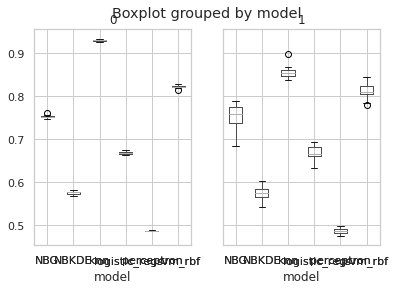

In [ ]:
boxplot = re_sorted.boxplot(column=[0, 1], by='model')

In [45]:
result_NB_KDE=[(0.568310075061763, 0.601932863495529),
 (0.5733334069704936, 0.5839387649195641),
 (0.5715759246083836, 0.5873355263157894),
 (0.5766417256213174, 0.5629006410256411),
 (0.5782195663832069, 0.5708222029204019),
 (0.5814470685650222, 0.541711882799783),
 (0.5766613643582886, 0.552286847217094),
 (0.5743298980813787, 0.5758974358974359),
 (0.5764382676147383, 0.5700675989131156),
 (0.5728177217121494, 0.5830197994518123)]


In [ ]:
result_NB_KDE

[(0.568310075061763, 0.601932863495529),
 (0.5733334069704936, 0.5839387649195641),
 (0.5715759246083836, 0.5873355263157894),
 (0.5766417256213174, 0.5629006410256411),
 (0.5782195663832069, 0.5708222029204019),
 (0.5814470685650222, 0.541711882799783),
 (0.5766613643582886, 0.552286847217094),
 (0.5743298980813787, 0.5758974358974359),
 (0.5764382676147383, 0.5700675989131156),
 (0.5728177217121494, 0.5830197994518123)]

In [ ]:
data

,Training AUC ROC value,testing AUC ROC value,model
0,0.824388,0.807337,svm_rbf
1,0.824591,0.832725,svm_rbf
2,0.827226,0.778060,svm_rbf
3,0.819699,0.820249,svm_rbf
4,0.821600,0.807551,svm_rbf
5,0.821596,0.811249,svm_rbf
6,0.820179,0.825027,svm_rbf
7,0.823276,0.805261,svm_rbf
8,0.813861,0.844196,svm_rbf
9,0.820788,0.782737,svm_rbf


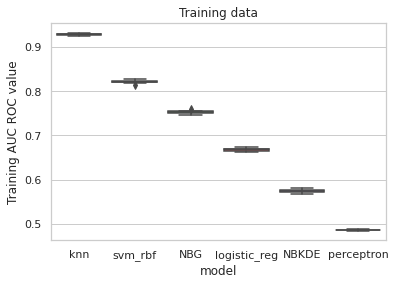

In [ ]:
import seaborn as sns
data1=pd.DataFrame()
data1["Training AUC ROC value"]=re_sorted[0]
data1["Testing AUC ROC value"]=re_sorted[1]
data1["model"]=re_sorted["model"]
#re.boxplot(by="model",widths = 5.6, patch_artist = True)


box=sns.boxplot(data=data1, x='model', y="Training AUC ROC value").set(title='Training data')


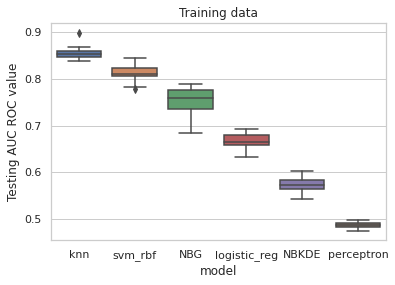

In [ ]:
box=sns.boxplot(data=data1, x='model', y="Testing AUC ROC value").set(title='Training data')

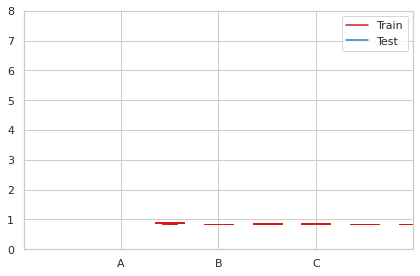

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

data_a = [[1,2,5], [5,7,2,2,5], [7,2,5]]
data_b = [[6,4,2], [1,2,5,3,2], [2,3,5,1]]

ticks = ['A', 'B', 'C']

def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color)

plt.figure()

bpl = plt.boxplot(result, positions = [1], widths=0.6)

set_box_color(bpl, '#D7191C') # colors are from http://colorbrewer2.org/
set_box_color(bpr, '#2C7BB6')

# draw temporary red and blue lines and use them to create a legend
plt.plot([], c='#D7191C', label='Train')
plt.plot([], c='#2C7BB6', label='Test')
plt.legend()

plt.xticks(range(0, len(ticks) * 2, 2), ticks)
plt.xlim(-2, len(ticks)*2)
plt.ylim(0, 8)
plt.tight_layout()
plt.savefig('boxcompare.png')

In [ ]:
result

0

In [ ]:
for i in range(10):
        r = list(range(10))
        r.pop(i)
        for j in r :
            if j == r[0]:
                cv = data[j]
            else:    
                cv=np.concatenate((cv,data[j]), axis=0)

In [ ]:
r = list(range(10))
cv[:, 5]

array([0., 0., 0., ..., 0., 0., 1.])

https://www.kaggle.com/burhanykiyakoglu/k-nn-logistic-regression-k-fold-cv-from-scratch

In [35]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
train_errors = list()
test_errors = list()
def perceptron(X_train1, y_train1, X_test1, y_test1):
  clf = StochasticPerceptron(epochs=10.0, lr=.1)
  clf.fit(X_train1,y_train1)
  
  y_test_pred1 = clf.predict(X_test1)
  y_train_pred1= clf.predict(X_train1)
   # Compute ROC curve and ROC area for each class
  train_fpr, train_tpr, tr_thresholds = roc_curve(y_train1, y_train_pred1)
  test_fpr, test_tpr, te_thresholds = roc_curve(y_test1, y_test_pred1)
  auc_train=auc(train_fpr,train_tpr)
  auc_test=auc(test_fpr,test_tpr)
  #return ((train_errors,test_errors),(train_fpr, train_tpr, tr_thresholds),(test_fpr, test_tpr, te_thresholds))
  return (auc_train, auc_test)

def knn_nested(X_train, y_train, X_test, y_test):
  estimator_KNN = KNeighborsClassifier(algorithm='auto')
  parameters_KNN = {
    'n_neighbors': (1,10, 1)}
                   
# with GridSearch
  grid_search_KNN = GridSearchCV(
    estimator=estimator_KNN,
    param_grid=parameters_KNN,
    scoring = 'accuracy',
    n_jobs = -1,
    cv = 5
  )
  
  #clf = KNeighborsClassifier(n_neighbors=3)
  grid_search_KNN.fit(X_train, y_train)
  grid_search_KNN.best_params_
  y_test_pred = grid_search_KNN.predict(X_test)
  y_train_pred= grid_search_KNN.predict(X_train)
  # Compute ROC curve and ROC area for each class
  train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
  test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)
  auc_train=auc(train_fpr,train_tpr)
  auc_test=auc(test_fpr,test_tpr)
  #return ((train_errors,test_errors),(train_fpr, train_tpr, tr_thresholds),(test_fpr, test_tpr, te_thresholds))
  return (auc_train, auc_test)


def svm_nested(X_train, y_train, X_test, y_test):
  inner_cv = KFold(n_splits=5, shuffle=True, random_state=None)
  parameters = {'kernel':('poly', 'rbf'), 'C':[1, 10]}
  svc = svm.SVC()
  clf = GridSearchCV(svc, parameters,cv=inner_cv)
  clf.fit(X_train, y_train)
  y_test_pred = clf.predict(X_test)
  y_train_pred= clf.predict(X_train)
  #train_errors = clf.score(X_train, y_train)
  #test_errors = clf.score(X_test, y_test)
  #print(train_errors)

  # Compute ROC curve and ROC area for each class
  train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
  test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)
  auc_train=auc(train_fpr,train_tpr)
  auc_test=auc(test_fpr,test_tpr)
  #return ((train_errors,test_errors),(train_fpr, train_tpr, tr_thresholds),(test_fpr, test_tpr, te_thresholds))
  return (auc_train, auc_test)


def logistic(X_train, y_train, X_test, y_test):
  clf = LogisticRegression(random_state=0).fit(X_train, y_train)
  y_test_pred = clf.predict(X_test)
  y_train_pred= clf.predict(X_train)
  #train_errors = clf.score(X_train, y_train)
  #test_errors = clf.score(X_test, y_test)
  #print(train_errors)

  # Compute ROC curve and ROC area for each class
  train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
  test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)
  auc_train=auc(train_fpr,train_tpr)
  auc_test=auc(test_fpr,test_tpr)
  #return ((train_errors,test_errors),(train_fpr, train_tpr, tr_thresholds),(test_fpr, test_tpr, te_thresholds))
  return (auc_train, auc_test)
from sklearn.naive_bayes import GaussianNB
def NB_gaussian_nested(X_train, y_train, X_test, y_test):
  nb_classifier = GaussianNB()
  inner_cv = KFold(n_splits=5, shuffle=True, random_state=None)
  params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
  clf = GridSearchCV(estimator=nb_classifier, 
                 param_grid=params_NB, 
                 cv=inner_cv,   # use any cross validation technique 
                 verbose=1, 
                 scoring='accuracy')
  
  y_pred = clf.fit(X_train, y_train)
  y_test_pred = clf.predict(X_test)
  y_train_pred= clf.predict(X_train)
  #train_errors = clf.score(X_train, y_train)
  #test_errors = clf.score(X_test, y_test)
  #print(train_errors)

  # Compute ROC curve and ROC area for each class
  train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
  test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)
  auc_train=auc(train_fpr,train_tpr)
  auc_test=auc(test_fpr,test_tpr)
  #return ((train_errors,test_errors),(train_fpr, train_tpr, tr_thresholds),(test_fpr, test_tpr, te_thresholds))
  return (auc_train, auc_test)

In [43]:
result_knn_nested=kfoldCV(X,model="knn_nested")

In [44]:
result_knn_nested

[(1.0, 0.8781249999999999),
 (1.0, 0.8660731109854909),
 (1.0, 0.8878904578519469),
 (1.0, 0.8698110424621839),
 (1.0, 0.8596363636363636),
 (1.0, 0.8636235161107971),
 (1.0, 0.8923019985196151),
 (1.0, 0.8755898024722366),
 (1.0, 0.8718795633127042),
 (1.0, 0.8775)]

In [37]:
result_svm_nested=kfoldCV(X,model="svm_nested")

In [38]:
result_svm_nested

[(0.843428230487665, 0.8429525067797787),
 (0.8428322859194051, 0.8448803445809981),
 (0.8417135751112873, 0.820109439124487),
 (0.8478252007663772, 0.8115768143763664),
 (0.842218065272324, 0.8648783489381517),
 (0.8467321259805214, 0.8368844853867057),
 (0.8510012398855092, 0.7694337469690486),
 (0.8500176294293941, 0.8263221153846154),
 (0.8408872959134462, 0.8275929549902153),
 (0.8433632746410367, 0.8398251192368839)]

In [42]:
result_gnb_nested=kfoldCV(X,model="GNB_nested")

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits


In [40]:
result_gnb_nested

[(0.7581948663581316, 0.7392167418074154),
 (0.7541525495859182, 0.7435617634220865),
 (0.7480154016869287, 0.7866105901820187),
 (0.7608394592614877, 0.7080592105263157),
 (0.7550609373641428, 0.7589645984012181),
 (0.7523901859985882, 0.762060606060606),
 (0.7572002923976608, 0.7304292929292929),
 (0.7512284881164321, 0.7417043153139119),
 (0.7492486898132984, 0.7742605085625325),
 (0.7500562792898786, 0.7698432760364003)]

In [55]:


result_svm_nested=pd.DataFrame(result_svm_nested)
result_svm_nested["model"]=["svm_nested"]*10
re_knn_nested=pd.DataFrame(result_knn_nested)
re_knn_nested["model"]=["knn_nested"]*10
re_nbg_nested=pd.DataFrame(result_gnb_nested)
re_nbg_nested["model"]=["NBG_nested"]*10
re_nbkde=pd.DataFrame(result_NB_KDE)
re_nbkde["model"]=["NBKDE"]*10

re=result_svm_nested.append(re_knn_nested,ignore_index=True)

re=re.append(re_nbg_nested,ignore_index=True)
re=re.append(re_nbkde,ignore_index=True)

re

,0,1,model
0,0.843428,0.842953,svm_nested
1,0.842832,0.844880,svm_nested
2,0.841714,0.820109,svm_nested
3,0.847825,0.811577,svm_nested
4,0.842218,0.864878,svm_nested
5,0.846732,0.836884,svm_nested
6,0.851001,0.769434,svm_nested
7,0.850018,0.826322,svm_nested
8,0.840887,0.827593,svm_nested
9,0.843363,0.839825,svm_nested


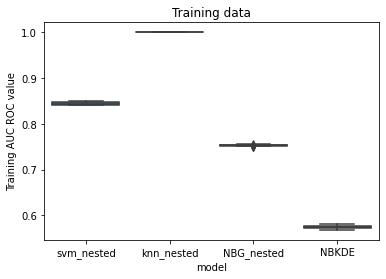

In [56]:
import seaborn as sns
data1=pd.DataFrame()
data2=pd.DataFrame()
data1["Training AUC ROC value"]=re[0]
data2["Testing AUC ROC value"]=re[1]
data1["model"]=re["model"]
data2["model"]=re["model"]
#re.boxplot(by="model",widths = 5.6, patch_artist = True)


box=sns.boxplot(data=data1, x='model', y="Training AUC ROC value").set(title='Training data')

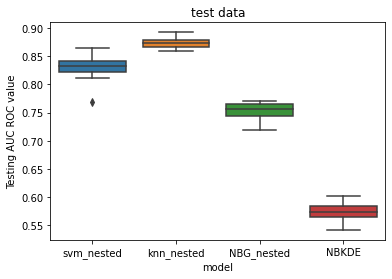

In [57]:
box=sns.boxplot(data=data2, x='model', y="Testing AUC ROC value").set(title='test data')

In [50]:
result_svm_nested=pd.DataFrame(result_svm_nested)
result_svm_nested["model"]=["svm_nested"]*10
re_knn_nested=pd.DataFrame(result_knn_nested)
re_knn_nested["model"]=["knn_nested"]*10
re_nbg_nested=pd.DataFrame(result_gnb_nested)
re_nbg_nested["model"]=["NBG_nested"]*10
re_nbkde=pd.DataFrame(result_NB_KDE)
re_nbkde["model"]=["NBKDE"]*10

re=re_knn_nested.append(result_svm_nested,ignore_index=True)

re=re.append(re_nbg_nested,ignore_index=True)
re=re.append(re_nbkde,ignore_index=True)

re

,0,1,model
0,1.000000,0.878125,knn_nested
1,1.000000,0.866073,knn_nested
2,1.000000,0.887890,knn_nested
3,1.000000,0.869811,knn_nested
4,1.000000,0.859636,knn_nested
5,1.000000,0.863624,knn_nested
6,1.000000,0.892302,knn_nested
7,1.000000,0.875590,knn_nested
8,1.000000,0.871880,knn_nested
9,1.000000,0.877500,knn_nested


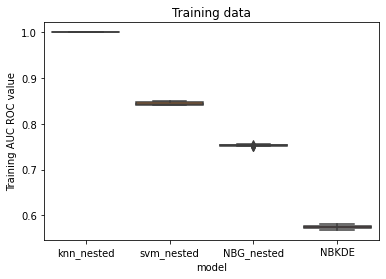

In [51]:
import seaborn as sns
data1=pd.DataFrame()
data1["Training AUC ROC value"]=re[0]
data1["Testing AUC ROC value"]=re[1]
data1["model"]=re["model"]
#re.boxplot(by="model",widths = 5.6, patch_artist = True)


box=sns.boxplot(data=data1, x='model', y="Training AUC ROC value").set(title='Training data')

In [58]:
from hpsklearn import HyperoptEstimator, svc
from sklearn import svm

#SVM
clf = HyperoptEstimator(classifier=svc('mySVC'))
clf =fit(X_train, y_train)
  y_test_pred = clf.predict(X_test)
  y_train_pred= clf.predict(X_train)
  #train_errors = clf.score(X_train, y_train)
  #test_errors = clf.score(X_test, y_test)
  #print(train_errors)

  # Compute ROC curve and ROC area for each class
  train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
  test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)
  auc_train=auc(train_fpr,train_tpr)
  auc_test=auc(test_fpr,test_tpr)
  #return ((train_errors,test_errors),(train_fpr, train_tpr, tr_thresholds),(test_fpr, test_tpr, te_thresholds))
  return (auc_train, auc_test)

#KNN

clf = HyperoptEstimator(classifier=KNeighborsClassifier(n_neighbors=3))
clf =fit(X_train, y_train)
  y_test_pred = clf.predict(X_test)
  y_train_pred= clf.predict(X_train)
  #train_errors = clf.score(X_train, y_train)
  #test_errors = clf.score(X_test, y_test)
  #print(train_errors)

  # Compute ROC curve and ROC area for each class
  train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
  test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)
  auc_train=auc(train_fpr,train_tpr)
  auc_test=auc(test_fpr,test_tpr)
  #return ((train_errors,test_errors),(train_fpr, train_tpr, tr_thresholds),(test_fpr, test_tpr, te_thresholds))
  return (auc_train, auc_test)
#GAUSSIAN NB

clf = HyperoptEstimator(classifier=GaussianNB())
clf =fit(X_train, y_train)
  y_test_pred = clf.predict(X_test)
  y_train_pred= clf.predict(X_train)
  #train_errors = clf.score(X_train, y_train)
  #test_errors = clf.score(X_test, y_test)
  #print(train_errors)

  # Compute ROC curve and ROC area for each class
  train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
  test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)
  auc_train=auc(train_fpr,train_tpr)
  auc_test=auc(test_fpr,test_tpr)
  #return ((train_errors,test_errors),(train_fpr, train_tpr, tr_thresholds),(test_fpr, test_tpr, te_thresholds))
  return (auc_train, auc_test)

ModuleNotFoundError: ignored